# Data Loading
Load csv files and concat them.

In [ ]:
!git clone https://github.com/christianadriano/RL_4_SelfHealingSystems.git

In [4]:
import os
import pandas as pd
import numpy

frames = []

for root, dirs, files in os.walk('../data/'):
    for f in files:
        if f.endswith(".csv"):
            file_path = os.path.join(root, f)
            dataframe = pd.read_csv(file_path)
            dataframe.columns = dataframe.columns.str.replace('\t', '')
            frames.append(dataframe)

data = pd.concat(frames, sort=False)[['Optimal_Affected_Component', 'Optimal_Failure', 'Optimal_Rule', 'Optimal_Utility_Increase']]
data.head()

,Optimal_Affected_Component,Optimal_Failure,Optimal_Rule,Optimal_Utility_Increase
0,Query Service,CF1,RestartComponent,49.5
1,User Management Service,CF2,RestartComponent,16.0
2,Authentication Service,CF3,ReplaceComponent,31.5
3,Bid and Buy Service,CF3,HwRedeployComponent,25.0
4,Item Management Service,CF3,HwRedeployComponent,16.0


# Task 1: Plot the distribution of rewards for each repair-action <component, failure, rule>

In [5]:
import matplotlib.pyplot as plt
data.boxplot(by=['Optimal_Affected_Component', 'Optimal_Failure', 'Optimal_Rule'], figsize=(20,5), showfliers=False)
plt.xticks(rotation='vertical')

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72]), <a list of 72 Text xticklabel objects>)

# Task 2: Compute statistics

* mean = average of the numbers
* median = separating the higher half from the lower half
* mode = the value that appears most often, it can be multiple values
* std = standard deviation
* skew = skewness, measure of the asymmetry of the probability distribution of a real-valued random variable about its mean
* kurtosis = measure of the "tailedness" of the probability distribution of a real-valued random variable

In [ ]:
data.groupby(['Optimal_Affected_Component', 'Optimal_Failure', 'Optimal_Rule']).agg(['mean', 'median', pd.Series.mode, 'std', 'skew', pd.DataFrame.kurt])

## Mean

In [ ]:
data.groupby(['Optimal_Affected_Component', 'Optimal_Failure', 'Optimal_Rule']).agg('mean').hist()

In [ ]:
# get the outliers
group = data.groupby(['Optimal_Affected_Component', 'Optimal_Failure', 'Optimal_Rule']).agg('mean').apply(lambda x: x)
group[group.Optimal_Utility_Increase > 1700]

## Median

In [ ]:
data.groupby(['Optimal_Affected_Component', 'Optimal_Failure', 'Optimal_Rule']).agg('median').hist()

In [ ]:
# get the outliers
group = data.groupby(['Optimal_Affected_Component', 'Optimal_Failure', 'Optimal_Rule']).agg('median').apply(lambda x: x)
group[group.Optimal_Utility_Increase > 550]

## Mode

In [ ]:
high_values = []

groups = data.groupby(['Optimal_Affected_Component', 'Optimal_Failure', 'Optimal_Rule']).agg(pd.Series.mode).apply(lambda x: x)
fig, ax = plt.subplots(figsize=(20,5))
for index, row in groups.iterrows():
  if isinstance(row['Optimal_Utility_Increase'], numpy.ndarray):
      for value in row['Optimal_Utility_Increase']:
        ax.plot(str(index), value, marker='o', linestyle='', ms=12, label=str(index))
        if value >= 400:
          high_values.append([str(index), value])
  else:
    ax.plot(str(index), row['Optimal_Utility_Increase'], marker='o', linestyle='', ms=8, label=str(index))
    if row['Optimal_Utility_Increase'] >= 400:
      high_values.append([str(index), row['Optimal_Utility_Increase']])

plt.xticks(rotation='vertical')
plt.show()

print('Outliers:')
for value in high_values:
  print(value)

## standard deviation

In [ ]:
data.groupby(['Optimal_Affected_Component', 'Optimal_Failure', 'Optimal_Rule']).agg('std').hist()

In [ ]:
# get the outliers
group = data.groupby(['Optimal_Affected_Component', 'Optimal_Failure', 'Optimal_Rule']).agg('std').apply(lambda x: x)
group[group.Optimal_Utility_Increase > 2000]

## skewness
measure of the asymmetry of the probability distribution of a real-valued random variable about its mean

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120e38e50>]],
      dtype=object)

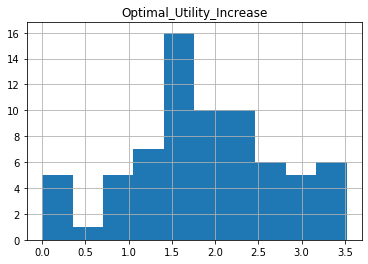

In [6]:
data.groupby(['Optimal_Affected_Component', 'Optimal_Failure', 'Optimal_Rule']).agg('skew').hist()

In [ ]:
# get the outliers
group = data.groupby(['Optimal_Affected_Component', 'Optimal_Failure', 'Optimal_Rule']).agg('skew').apply(lambda x: x)
pd.concat([group[group.Optimal_Utility_Increase < 0.5], group[group.Optimal_Utility_Increase > 3.0]], sort=False)

## kurtosis
measure of the "tailedness" of the probability distribution of a real-valued random variable

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11fd02d10>]],
      dtype=object)

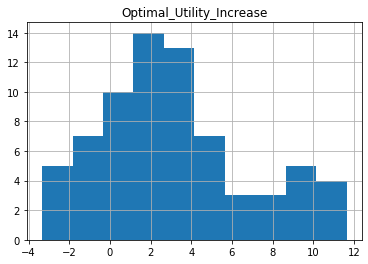

In [7]:
data.groupby(['Optimal_Affected_Component', 'Optimal_Failure', 'Optimal_Rule']).agg(pd.DataFrame.kurt).hist()

In [ ]:
# get the outliers
group = data.groupby(['Optimal_Affected_Component', 'Optimal_Failure', 'Optimal_Rule']).agg(pd.DataFrame.kurt).apply(lambda x: x)
pd.concat([group[group.Optimal_Utility_Increase < 0], group[group.Optimal_Utility_Increase > 7]], sort=False)

# Result:

The combination of <Query Service,CF5,AddReplica> shows particular high values (compare Mean and Median Results) while the distribution is very large. 